## Data description: trends in 10-year time slices

Author: Karin van der Wiel, 02-08-2022

Aim: test to what extent the assumption of 'no climate change within a time slice' holds


This notebook creates Figure XX of the paper, but uses output from a different script (DataDescr_10yeartrend.py). Please run that script before running this notebook. 

#### Preparation

In [1]:
## import packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.colors as colors

## data locations
output_directory='/net/pc170544/nobackup/users/wiel/LENTIS/datapaper/'

#### Open data

In [2]:
ds_gmst_PD = xr.open_dataset(f"{output_directory}/gmst_ann_trends_PD.nc")
da_gmst_PD = ds_gmst_PD['gmst']
da_gmst_slope_PD = ds_gmst_PD['gmst_slope']
da_gmst_ens_slope_PD = ds_gmst_PD['gmst_ens_slope']
da_tas_ens_slope_PD = ds_gmst_PD['tas_ens_slope']
ds_gmst_PD.close()

ds_gmst_2K = xr.open_dataset(f"{output_directory}/gmst_ann_trends_2K.nc")
da_gmst_2K = ds_gmst_2K['gmst']
da_gmst_slope_2K = ds_gmst_2K['gmst_slope']
da_gmst_ens_slope_2K = ds_gmst_2K['gmst_ens_slope']
da_tas_ens_slope_2K = ds_gmst_2K['tas_ens_slope']
ds_gmst_2K.close()

#### Plot figure

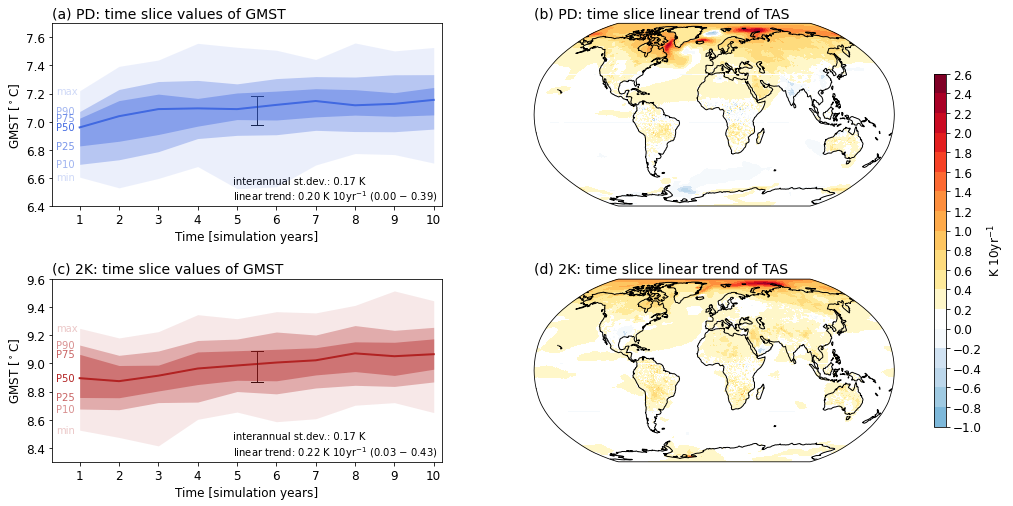

In [3]:
import matplotlib.colors as colors
def plot_RangeGMSTValues(da_gmst,da_gmst_slopes,da_gmst_ens_slope,colour,title,xlabel=True):
    da_gmst = da_gmst - 273.15
    # plot data
    plt.plot(range(1,11),da_gmst.quantile(.5,dim='ens'),linewidth=2,color=colour,zorder=1)
    plt.fill_between(range(1,11),da_gmst.quantile(.25,dim='ens'),da_gmst.quantile(.75,dim='ens'),color=colour,alpha=.4,linewidth=0,zorder=5)
    plt.fill_between(range(1,11),da_gmst.quantile(.1,dim='ens'),da_gmst.quantile(.9,dim='ens'),color=colour,alpha=.3,linewidth=0,zorder=5)
    plt.fill_between(range(1,11),da_gmst.min(dim='ens'),da_gmst.max(dim='ens'),color=colour,alpha=.1,linewidth=0,zorder=5)
    # plot size of linear trend
    plt.plot([5.5,5.5],[da_gmst.mean().values-da_gmst_ens_slope.values/2*10,da_gmst.mean().values+da_gmst_ens_slope.values/2*10],linewidth=1,color=colour3,zorder=1)
    plt.plot([5.35,5.65],[da_gmst.mean().values+da_gmst_ens_slope.values/2*10,da_gmst.mean().values+da_gmst_ens_slope.values/2*10],linewidth=1,color=colour3,zorder=1)
    plt.plot([5.35,5.65],[da_gmst.mean().values-da_gmst_ens_slope.values/2*10,da_gmst.mean().values-da_gmst_ens_slope.values/2*10],linewidth=1,color=colour3,zorder=1)
    # add manual legend
    plt.text(1-.6,da_gmst[:,0].quantile(.5,dim='ens'),'P50',fontsize=10,va='center',color=colour)
    plt.text(1-.6,da_gmst[:,0].quantile(.25,dim='ens'),'P25',fontsize=10,va='center',color=colour,alpha=.7)
    plt.text(1-.6,da_gmst[:,0].quantile(.75,dim='ens'),'P75',fontsize=10,va='center',color=colour,alpha=.7)
    plt.text(1-.6,da_gmst[:,0].quantile(.1,dim='ens'),'P10',fontsize=10,va='center',color=colour,alpha=.5)
    plt.text(1-.6,da_gmst[:,0].quantile(.9,dim='ens'),'P90',fontsize=10,va='center',color=colour,alpha=.5)
    plt.text(1-.6,da_gmst[:,0].min(dim='ens'),'min',fontsize=10,va='center',color=colour,alpha=.25)
    plt.text(1-.6,da_gmst[:,0].max(dim='ens'),'max',fontsize=10,va='center',color=colour,alpha=.25)
    # annotation
    plt.title(title,loc='left',fontsize=14)
    if xlabel:
        plt.xlabel('Time [simulation years]',fontsize=12)
    plt.ylabel('GMST [$^\circ$C]',fontsize=12)
    plt.xticks(range(1,11))
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    plt.xlim(1-.7,10+.2)
    # all plots same y-scale
    yrange = 1.3
    y_bot = np.floor((da_gmst.mean()-yrange/2)*10)/10
    plt.ylim(y_bot,y_bot+yrange)
    # add information linear regression values
    text = f"interannual st.dev.: {da_gmst.std().values:.2f} K\nlinear trend: {da_gmst_ens_slope.values*10:.2f} K 10yr$^{{-1}}$ ({da_gmst_slopes.quantile(.1).values*10:.2f} $-$ {da_gmst_slopes.quantile(.9).values*10:.2f})"
    plt.text(4.9,y_bot+.015,f"{text}",fontsize=10,ha='left',va='bottom',color=colour3)
def plot_TrendMap(da_slope,title):
    # define colour levels, colours
    clevs = np.arange(-1,2.61,.2)
    col_n = plt.cm.Blues_r(np.linspace(0, 1, 12))
    col_p = plt.cm.YlOrRd(np.linspace(0, 1, 12)) 
    col_comb = np.vstack((col_n[-6:-2],[1,1,1,1],[1,1,1,1],col_p[1:]))
    my_cmap = colors.LinearSegmentedColormap.from_list('mc1', col_comb, len(clevs)-1)
    my_cmap.set_under(col_n[0])
    my_cmap.set_over(col_p[-1])
    norm = colors.BoundaryNorm(clevs,ncolors=len(clevs)-1,clip=False)
    # plot
    colourmap = ax.pcolormesh(da_slope.lon,da_slope.lat,da_slope*10, transform=ccrs.PlateCarree(), cmap=my_cmap, norm=norm)
    ax.set_global()
    ax.coastlines()
    plt.title(title,loc='left',fontsize=14)
    return colourmap

fig,ax1 = plt.subplots(figsize=(14,7))
plt.subplots_adjust(left=0.05, bottom=0.08, right=.9, top=0.95, hspace=.4)
colour1 = 'royalblue'
colour2 = 'firebrick'
colour3 = 'black'
# GMST time series: PD
ax = plt.subplot(2,2,1)
plot_RangeGMSTValues(da_gmst_PD,da_gmst_slope_PD,da_gmst_ens_slope_PD,colour1,'(a) PD: time slice values of GMST')#,xlabel=False)
# GMST time series: 2K
ax = plt.subplot(2,2,3)
plot_RangeGMSTValues(da_gmst_2K,da_gmst_slope_2K,da_gmst_ens_slope_2K,colour2,'(c) 2K: time slice values of GMST')

# Trend map: PD
ax = plt.subplot(2,2,2,projection=ccrs.Robinson())
colourmap = plot_TrendMap(da_tas_ens_slope_PD,'(b) PD: time slice linear trend of TAS')
# Trend map: 2C
ax = plt.subplot(2,2,4,projection=ccrs.Robinson())
_ = plot_TrendMap(da_tas_ens_slope_2K,'(d) 2K: time slice linear trend of TAS')
# Legend
cbar_ax = fig.add_axes([.925,0.15,.012,.7]) #xpos,ypos,xlen,ylen
cbar = plt.colorbar(colourmap,orientation='vertical',cax=cbar_ax)#,extend='max'
cbar.set_label(f"K 10yr$^{{-1}}$", rotation=90, fontsize=12)
cbar.set_ticks(np.arange(-1,2.61,.2))
cbar.ax.tick_params(labelsize=12)
plt.savefig('fig_datadescr_10yrtrend.pdf')

plt.show()

#### Some relevant values on the time slice ensembles

In [4]:
text = f"Mean GMST per time slice:\n\tPD:\t{da_gmst_PD.mean().values:.2f} K\n\t2K:\t{da_gmst_2K.mean().values:.2f} K\n\tDiff:\t{(da_gmst_2K.mean().values-da_gmst_PD.mean().values):.2f} K   <- not really 2K as planned"
print(text)
print('\n')
text = f"Linear trend of GMST per time slice:\n\tPD:\t{da_gmst_ens_slope_PD.values*10:.2f} K/10yr (all members together)\n\t2K:\t{da_gmst_ens_slope_2K.values*10:.2f} K/10yr"
text = text+f"\n\tPD:\t{da_gmst_slope_PD.quantile(.5).values*10:.2f} K/10yr (median value individual members)\n\t2K:\t{da_gmst_slope_2K.quantile(.5).values*10:.2f} K/10yr"
print(text)
print('\n')
text = f"Standard deviation of GMST:\n\tPD:\t{da_gmst_PD.std().values:.2f} K (all years together)\n\t2K:\t{da_gmst_2K.std().values:.2f} K\n\tPD:\t{da_gmst_PD.std(dim='ens').median().values:.2f} K (median value of indiviudal years)\n\t2K:\t{da_gmst_2K.std(dim='ens').median().values:.2f} K"
print(text)


Mean GMST per time slice:
	PD:	280.23 K
	2K:	282.13 K
	Diff:	1.90 K   <- not really 2K as planned


Linear trend of GMST per time slice:
	PD:	0.20 K/10yr (all members together)
	2K:	0.22 K/10yr
	PD:	0.19 K/10yr (median value individual members)
	2K:	0.23 K/10yr


Standard deviation of GMST:
	PD:	0.17 K (all years together)
	2K:	0.17 K
	PD:	0.15 K (median value of indiviudal years)
	2K:	0.16 K
